In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import os
from math import ceil

In [2]:
label_markers = ['true', 'random_labels', 'shuffled', 'random_pixels', 'gaussian']

datasets = []
for label in label_markers:
    label_data = pd.DataFrame()
    for file in os.listdir(os.getcwd()):
        if ".csv" in file and label in file:
            path = os.path.join(os.getcwd(), file)
            data = pd.read_csv(path)
            label_data = label_data.append(data, sort = False)
    datasets.append(data)

In [3]:
bs = 200
spe = ceil(50000 / bs)

for dataset in datasets:
    dataset["thousand steps"] = ((dataset["epoch"] + 1)*spe)/1000

In [4]:
true_label_format = [{'c': "blue", 'marker': 's', 'edgecolors': 'black'},
                    {'c': "blue"}]

random_label_format = [{'c': "red", 'marker': 'o', 'edgecolors': 'black'},
                    {'c': "red"}]

shuffled_pixel_format = [{'c': '#00ff00', 'marker': '*', 'edgecolors': 'black'},
                    {'c': '#00ff00'}]

random_pixel_format = [{'c': None, 'marker': None, 'edgecolors': None},
                    {'c': "#D742F4"}]

gaussian_format = [{'c': 'black', 'marker': 'D', 'edgecolors': 'black'},
                    {'c': "black"}]

formats = [true_label_format, random_label_format, shuffled_pixel_format, random_pixel_format, gaussian_format]
legend_names = ['true labels', 'random labels', 'shuffled pixels', 'random pixels', 'gaussian']

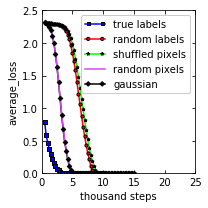

In [17]:
%matplotlib inline
fig1 = plt.figure(figsize=(3,3))
i = 0
array_of_linmarks=[]
for dataset, data_format in zip(datasets, formats):
    lin = None
    mark = None
    ax = plt.gca()
    z = 5 if i == 3 else 0
    if i != 3:
        mark = ax.scatter(dataset["thousand steps"].values[1:],
                    dataset["loss"].values[1:],
                    s = 10,
                    zorder = 10,
                    **data_format[0])
    lin, = ax.plot(dataset["thousand steps"].values[1:],
            dataset["loss"].values[1:],
            zorder = z,
            **data_format[1]
           )
    if mark:
        array_of_linmarks.append((lin, mark))
    else:
        array_of_linmarks.append((lin))
    i+=1
ax.tick_params(axis = 'both', direction = 'in', top = True, right = True)
leg = ax.legend(array_of_linmarks, legend_names, scatterpoints=2, framealpha = 1, scatteryoffsets=[0.5])
leg.set_zorder(20)
leg.get_frame().set_facecolor('w')
ax.set_xticks([0, 5, 10, 15, 20, 25])
ax.set_yticks([0, 0.5, 1, 1.5, 2.0, 2.5])

plt.draw()

plt.xlabel("thousand steps")
plt.ylabel("average_loss")
plt.xlim(0, 25)
plt.ylim(0, 2.5)
plt.tight_layout()
fig1.savefig("output.eps")
fig1.savefig("output.png")

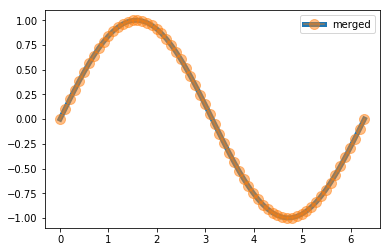

In [19]:
import numpy as np
th = np.linspace(0, 2 * np.pi, 64)
y = np.sin(th)
ax = plt.gca()

lin, = ax.plot(th, y, lw=5)
mark, = ax.plot(th, y, marker='o', alpha=.5, ms=10)

ax.legend([(lin, mark)], ['merged'], scatterpoints=2)
plt.draw()